In [35]:
# 1. Load the data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the CSV file
df = pd.read_csv("wine_dataset.csv")

print("Preview of the dataset:")
display(df.head())

Preview of the dataset:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


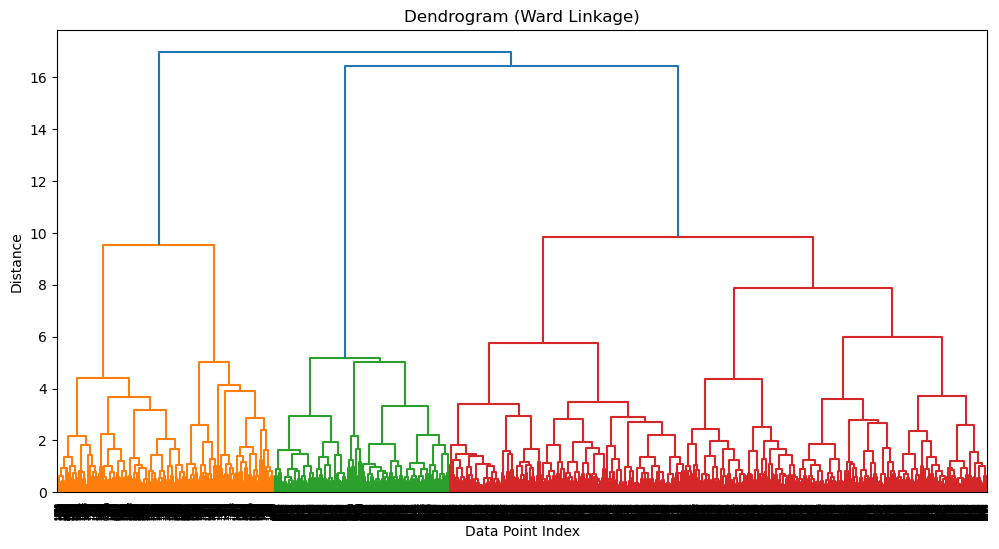

cluster
1    1519
2    1229
3    3749
Name: count, dtype: int64


In [32]:
# 2. Keep only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 3. Scaling (normalization) with MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# 4. Build linkage with Ward method
linkage_matrix = linkage(df_scaled, method='ward')

# 5. Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

# 6. Cut the tree into 3 clusters and get labels (1..3)
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# 7. Attach labels back to the DataFrame
df['cluster'] = cluster_labels  # or df_scaled['cluster'] = cluster_labels

# Print counts per cluster
print(df['cluster'].value_counts().sort_index())


Cluster sizes:
cluster
0    1970
1    2908
2    1619
Name: count, dtype: int64

Percentage of total:
cluster
0    30.32
1    44.76
2    24.92
Name: count, dtype: float64

Numerical feature means by cluster:
         fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
cluster                                                                 
0                6.972             0.284        0.355          10.833   
1                6.757             0.270        0.320           3.395   
2                8.334             0.533        0.272           2.564   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density     pH  \
cluster                                                                         
0            0.053               44.860               169.093    0.997  3.157   
1            0.040               29.089               116.927    0.992  3.212   
2            0.088               15.663                48.707    0.997  3.304   

         sulphates  

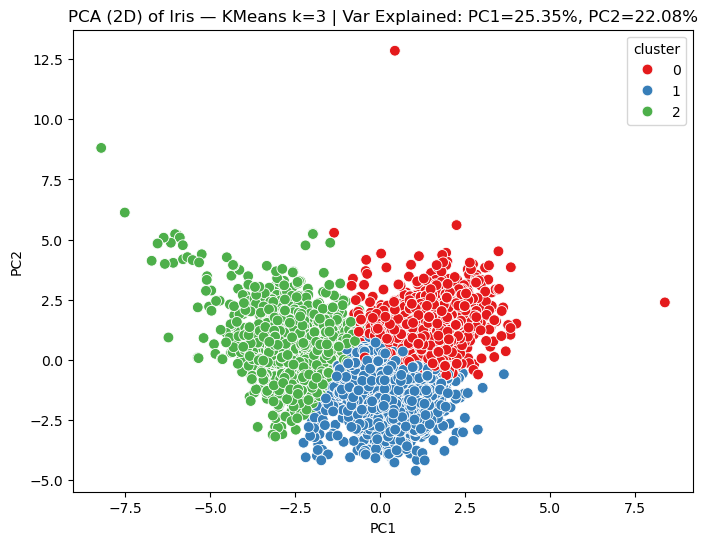

In [24]:
# Bonus - 

# 8.
df = pd.read_csv("wine_dataset.csv")

num_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters  

sizes = df['cluster'].value_counts().sort_index()
print("\nCluster sizes:")
print(sizes)
print("\nPercentage of total:")
print((sizes / len(df) * 100).round(2))

cluster_means = df.groupby('cluster')[num_df.columns].mean().round(3)
print("\nNumerical feature means by cluster:")
print(cluster_means)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters
explained = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set1', s=60)
plt.title(f"PCA (2D) of Iris — KMeans k=3 | Var Explained: PC1={explained[0]:.2%}, PC2={explained[1]:.2%}")
plt.show()

# The numbers did not come out the same because KMeans is a statistical process that depends on random initialization, 
# so the partition differs from Hierarchical even when the number of clusters is the same.

In [43]:
# Bonus - 

# 9.

df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Standardize features (common before PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply PCA without fixing n_components (keep all, to check variance explained)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Shape of transformed data
print("PCA transformed shape:", pca_result.shape)

# Explained variance ratio (in %)
print("\nExplained variance ratio (% per component):")
print(pca.explained_variance_ratio_ * 100)

# Cumulative variance explained
print("\nCumulative explained variance (%):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

PCA transformed shape: (6497, 12)

Explained variance ratio (% per component):
[25.34622611 22.08211664 13.67922348  8.90521046  7.00417055  5.50332647
  4.69855374  4.29985699  3.81976903  2.49177418  1.89656266  0.2732097 ]

Cumulative explained variance (%):
[ 25.34622611  47.42834274  61.10756622  70.01277668  77.01694722
  82.5202737   87.21882744  91.51868443  95.33845345  97.83022763
  99.7267903  100.        ]
